# Bonus: Temperature Analysis I

In [75]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# "tobs" is "temperature observations"
hawaii_df = pd.read_csv('Resources/hawaii_measurements.csv')
hawaii_df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [64]:
# Convert the date column format from string to datetime
hawaii_df.date = pd.to_datetime(hawaii_df.date, infer_datetime_format=True)
# Set the date column as the DataFrame index
hawaii_df = hawaii_df.set_index(hawaii_df['date'])
hawaii_df.head()

,station,date,prcp,tobs
date,,,,
2010-01-01,USC00519397,2010-01-01,0.08,65
2010-01-02,USC00519397,2010-01-02,0.00,63
2010-01-03,USC00519397,2010-01-03,0.00,74
2010-01-04,USC00519397,2010-01-04,0.00,76
2010-01-06,USC00519397,2010-01-06,NaN,73


In [65]:
# Drop the date column
hawaii_df = hawaii_df.drop(columns='date')
hawaii_df.head()

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


### Compare June and December data across all years 

In [66]:
from scipy import stats

In [67]:
# Filter data for desired months
   #june
June_Data = hawaii_df[hawaii_df.index.month == 6]
June_Data.head()

,station,prcp,tobs
date,,,
2010-06-01,USC00519397,0.00,78
2010-06-02,USC00519397,0.01,76
2010-06-03,USC00519397,0.00,78
2010-06-04,USC00519397,0.00,76
2010-06-05,USC00519397,0.00,77


In [68]:
   #december
December_Data = hawaii_df[hawaii_df.index.month == 12]
December_Data.head()

,station,prcp,tobs
date,,,
2010-12-01,USC00519397,0.04,76
2010-12-03,USC00519397,0.00,74
2010-12-04,USC00519397,0.00,74
2010-12-06,USC00519397,0.00,64
2010-12-07,USC00519397,0.00,64


In [69]:
# Identify the average temperature for June
June_Data['tobs'].mean()

74.94411764705882

In [70]:
# Identify the average temperature for December
December_Data['tobs'].mean()

71.04152933421226

In [71]:
# Create collections of temperature data
    #June Temperature
June_Temp = June_Data.tobs
June_Temp

date
2010-06-01    78
2010-06-02    76
2010-06-03    78
2010-06-04    76
2010-06-05    77
              ..
2017-06-26    79
2017-06-27    74
2017-06-28    74
2017-06-29    76
2017-06-30    75
Name: tobs, Length: 1700, dtype: int64

In [72]:
     #December Temperature
December_Temp = December_Data.tobs
December_Temp  

date
2010-12-01    76
2010-12-03    74
2010-12-04    74
2010-12-06    64
2010-12-07    64
              ..
2016-12-27    71
2016-12-28    71
2016-12-29    69
2016-12-30    65
2016-12-31    65
Name: tobs, Length: 1517, dtype: int64

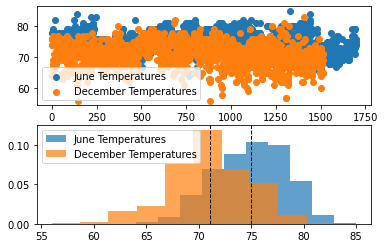

In [76]:
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(June_Temp)), June_Temp, label="June Temperatures")
plt.scatter(range(len(December_Temp )), December_Temp, label="December Temperatures")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(June_Temp, 10, density=True, alpha=0.7, label="June Temperatures")
plt.hist(December_Temp, 10, density=True, alpha=0.7, label="December Temperatures")
plt.axvline(np.mean(June_Temp), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(December_Temp), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.savefig('June_Dec_scatterplot_histogram.png')

In [77]:
# Run paired t-test
stats.ttest_ind(June_Temp,December_Temp)


Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

### Analysis

The mean temperature difference between the June and December is a mere 3.9 degrees Fahrenheit. The result does not appear to show much of a difference. But the t-test with very low p-value indicates that the difference is statistically significant. So while the difference is meaningful, the actual difference is not, thereby indicating that you can travel to Hawaii and enjoy in 70 degrees temperature year-round.